In [19]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import math

In [20]:
df2 = pd.read_csv('data_csv.csv', index_col='loan_applicant_id')
df2.head()
df2 = df2.dropna()

df2 = pd.read_csv('application_train.csv/application_train.csv')#, index_col='SK_ID_CURR')
df2.head()

# df2 = pd.read_csv('default_real.csv')#, index_col='SK_ID_CURR')
# df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# x = df2['household_income'].values
# y = df2['y'].values
# print(x,y, sep="\n")
# print(type(x), type(y), sep="\n")

x = df2['AMT_INCOME_TOTAL'].values
y1 = df2['TARGET'].values
y = np.array([1 if i==0 else 0 for i in y1])
print(x,y,len(x),len(y), sep="\n")
print(type(x), type(y), sep="\n")

# x = df2['income'].values
# y1 = df2['default'].values
# y = np.array([1 if i=="No" else 0 for i in y1])
# print(x,y,len(x),len(y), sep="\n")
# print(type(x), type(y), sep="\n")

[202500. 270000.  67500. ... 153000. 171000. 157500.]
[0 1 1 ... 1 0 1]
307511
307511
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


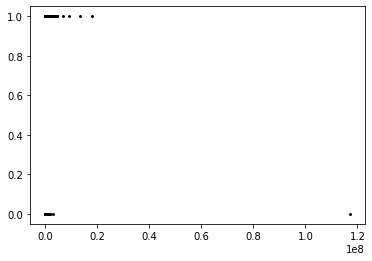

In [22]:
plt.scatter(x, y, color="black", marker = "X", s=3)


In [23]:
# import seaborn as sns
# sns.regplot(x=x, y=y, data=df2, logistic=True)
print(x,y, sep="\n")

[202500. 270000.  67500. ... 153000. 171000. 157500.]
[0 1 1 ... 1 0 1]


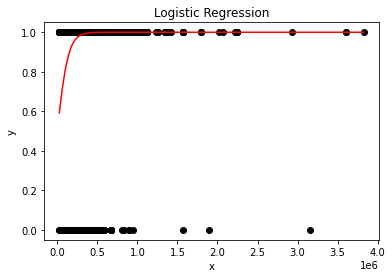

In [24]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, np.array(y), test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test, color="black")

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()

In [25]:
def f(x, b, mu, sigma):#,scal):
    # print(x)?
    # result = []
    # for x_ in x:
    #     b_over = b/x_
    #     if b_over <= 0:
    #         print(b,x,b_over)
    #     lnb = math.log(b_over)
    #     term_2 = mu - (sigma**2)/2
    #     lnb = lnb - term_2
    #     lnb = lnb/sigma
    #     lnb = norm.cdf(lnb)
    #     result.append(lnb)
        # print(lnb)
    b_over = [math.log(b/x_) for x_ in x]
    # lnb = np.log(b_over)
    term_2 = mu - (sigma**2)/2
    result = [x_ - term_2 for x_ in b_over]
    result = [temp/sigma for temp in result]
    result = [norm.cdf(temp) for temp in result]
    result = [1-temp for temp in result]
    # result = [scal*temp for temp in result]



    # print(result)
    # result = []
    # for arr in b_over:
    #     # print(arr)
    #     arr = arr - term_2
    #     result.append(arr)
    
    # result = [i if type(i) =="float" else i[0] for i in lnb]
    # result = [i[0] - term_2 for i in lnb]
    # print(lnb, result)
    return result

In [26]:
popt, pcov = curve_fit(f, 
                       x_train.astype(float), 
                       y_train.astype(float),
                    #    p0=[1,1,1],
                       bounds=([0,-1* math.inf,0], [np.inf, np.inf, np.inf]),
                     #   bounds=([0,-1* math.inf,0, -1* math.inf], [np.inf, np.inf, np.inf, 0]),
                       maxfev=1000)

# when b is positive the curve is concave and it doesn't work
# adding a scalar that can curve eitehr


In [27]:
print(popt, pcov, sep="\n")
# pcov

[1. 1. 1.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


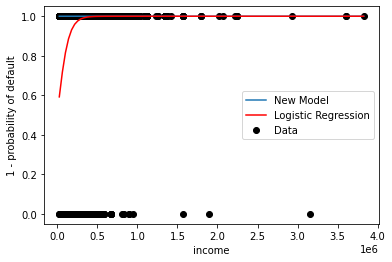

In [28]:
# plot the original data
plt.scatter(x_test, y_test, label='Data', color="black")
# Ommitted
# plt.xlim([240, 245])
# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100000)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='New Model')
# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red', label="Logistic Regression")
# add labels and legend
plt.xlabel('income')
plt.ylabel('1 - probability of default')
plt.legend()

# plt.xlim([240, 245])
# Save the plot to a file
plt.savefig('plots/HMDAMortgage.png')

# Show the plot
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
predictions = f(x_test, *popt)
print(mean_squared_error(y_test, predictions))

predictions = logreg.predict(x_test)
print(mean_squared_error(y_test, predictions))

0.0792294284450688
0.0792294284450688


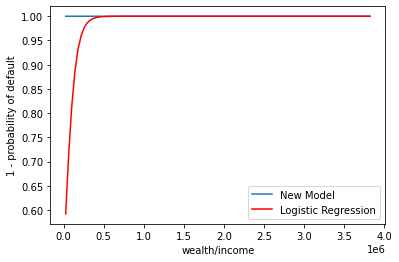

In [30]:
# plot the original data
# plt.scatter(x_test, y_test, label='Data', color="black")
# Ommitted
# plt.xlim([240, 245])
# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100000)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='New Model')
# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red', label="Logistic Regression")
# add labels and legend
plt.xlabel('wealth/income')
plt.ylabel('1 - probability of default')
plt.legend()

# plt.xlim(["0","1"])
# Save the plot to a file
plt.savefig('plots/HMDAMortgage2.png')

# Show the plot
plt.show()

In [31]:
# Comparision of mean squared error for both models
# Our model
from sklearn.metrics import mean_squared_error
predictions = f(x_test, *popt)
print(mean_squared_error(y_test, predictions))

# Log model
predictions = logreg.predict(x_test)
print(mean_squared_error(y_test, predictions))

0.0792294284450688
0.0792294284450688


In [32]:
# do the same for log-loss
from sklearn.metrics import log_loss
predictions = f(x_test, *popt)
print(log_loss(y_test, predictions))

# Log model
predictions = logreg.predict(x_test)
print(log_loss(y_test, predictions))


2.736550864608189
2.736550864608189


In [33]:
import random
def bernoulli(salary):
    prob = 198781.63567176525/salary
    val = lambda x: 0 if x <= prob else 1
    return val(random.random())

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import random

# Set mean and standard deviation of the underlying normal distribution
mu, sigma = 12.2, 2

# Generate lognormal random variables with mean mu and standard deviation sigma
s = np.random.lognormal(mu, sigma, 1000)
s_new = []
for _ in s:
    if _ <0.8*10**7:
        s_new.append(_)
# s = [_ if _ < 2*10**7 else continue for _ in s]

for i in range(10000):
    var = random.randint(0, 5*10**6)
    s_new.append(var)
s = np.array(s_new)
print(s, len(s))

# Mean of s
print(np.mean(s))

y = [bernoulli(salary) for salary in s]
x =s


# # Compute PDF of the lognormal distribution
# x = np.linspace(0, 100, 1000)
# pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# # Plot the histogram of the generated sample and the PDF of the lognormal distribution
# fig, ax = plt.subplots()
# ax.hist(s, bins=50, density=True, alpha=0.5)
# ax.plot(x, pdf, 'r', lw=2, alpha=0.5)
# ax.set_xlabel('x')
# ax.set_ylabel('Probability density')
# plt.show()


[1188180.73317853 1434843.38155906 1573743.55937452 ...  686920.
 2435545.         2824311.        ] 10969
2334441.7162671373


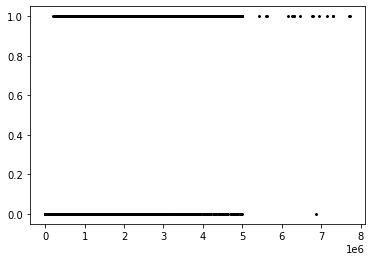

In [35]:
plt.scatter(x, y, color="black", marker = "X", s=3)


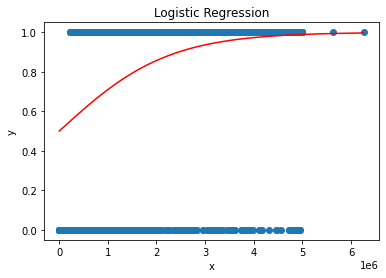

In [36]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test)

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()